In [16]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#ndvi = density of green
#precipitation = rain amount

df = pd.read_csv('dengue_features_train.csv')

label_columns = ['city', 'total_cases']
labels = pd.read_csv('dengue_labels_train.csv')
# df = pd.read_csv('dengue_features_train.csv', index_col=[3], parse_dates=['week_start_date'])
data = pd.concat([df, labels['total_cases']], axis=1, join_axes=[df.index])
data['week_start_date'] = pd.to_datetime(data['week_start_date'])
data = data.set_index('week_start_date')

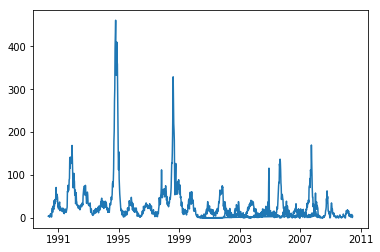

In [24]:
ts = data['total_cases']
rt = ts.head(10)
plt.plot(ts)

In [ ]:
data = data.dropna()
data['precipitation_amt_mm'] = data['precipitation_amt_mm'].rolling(window=50, min_periods=(1)).mean()
data['station_avg_temp_c'] = data['station_avg_temp_c'].rolling(window=50, min_periods=(1)).mean()


data_sj = data[data['city']=='sj']
data_iq = data[data['city']=='iq']

data_sj = data_sj.drop('city', axis=1)
data_iq = data_iq.drop('city', axis=1)
data_sj = data_sj.drop('total_cases', axis=1)
data_iq = data_iq.drop('total_cases', axis=1)


labels_sj = data[data['city']=='sj']
labels_iq = data[data['city']=='iq']

sj_train_features, sj_test_features, sj_train_labels, sj_test_labels = train_test_split(
    data_sj, labels_sj['total_cases'], test_size=0.25, random_state=0, shuffle=False)

iq_train_features, iq_test_features, iq_train_labels, iq_test_labels = train_test_split(
    data_iq, labels_iq['total_cases'], test_size=0.25, random_state=0, shuffle=False)

In [33]:
# df['week_start_date'] = pd.to_datetime(df['week_start_date'])
# df['week_start_date'] = df['week_start_date'].dt.week

In [2]:
from sklearn import linear_model

# # for sj
X = sj_train_features
y = sj_train_labels

X1 = iq_train_features
y1 = iq_train_labels

In [3]:
# lm1 = linear_model.LinearRegression()
# lm1.fit(X,y)

# predictions_sj = lm1.predict(test_features_sj).astype(int)
# predictions_sj = predictions_sj.clip(min=0)

# lm2 = linear_model.LinearRegression()

# lm2.fit(X1, y1)

# predictions_iq = lm2.predict(test_features_iq).astype(int)
# predictions_iq = predictions_iq.clip(min=0)

In [21]:
# sq_pred_val = lm1.predict(sj_test_features).astype(int)
# iq_pred_val = lm2.predict(iq_test_features).astype(int)

# iq_error = mean_absolute_error(iq_test_labels, iq_pred_val)
# sj_error = mean_absolute_error(sj_test_labels, sq_pred_val)

In [22]:
sj_error, iq_error

(20.593406593406595, 8.099173553719009)

In [16]:
# sj_error, iq_error  == (22.188034188034187, 8.36923076923077) without removing nan rows and fill with mean
# linear

In [ ]:
# sj_error, iq_error  == (20.593406593406595, 8.099173553719009)  removing nan rows completely
# linear

In [ ]:
# --------------------------------------------- Random Forest ---------------------------------

In [3]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)
model.fit(X,y)

predictions_sj = model.predict(sj_test_features).astype(int)
predictions_sj = predictions_sj.clip(min=0)

model1 = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)
model1.fit(X1, y1)
predictions_iq = model1.predict(iq_test_features).astype(int)
predictions_iq = predictions_iq.clip(min=0)

In [4]:
iq_error = mean_absolute_error(iq_test_labels, predictions_iq)
sj_error = mean_absolute_error(sj_test_labels, predictions_sj)

In [36]:
sj_error, iq_error

(17.346153846153847, 7.917355371900826)

In [6]:
sj_error, iq_error

(18.604395604395606, 7.884297520661157)

In [11]:
sj_error, iq_error

(13.934065934065934, 8.12396694214876)

In [24]:
sj_error, iq_error

(13.906593406593407, 8.099173553719009)

In [5]:
sj_error, iq_error

(13.873626373626374, 8.090909090909092)

In [13]:
test_features = pd.read_csv('dengue_features_test.csv', usecols=feature_columns)

test_features = test_features.fillna(test_features.mean())

test_features_sj = test_features[test_features['city']=='sj']
test_features_iq = test_features[test_features['city']=='iq']

test_features_sj = test_features_sj.drop('city', axis=1)
test_features_iq = test_features_iq.drop('city', axis=1)

predictions_sj = model.predict(test_features_sj).astype(int)
predictions_sj = predictions_sj.clip(min=0)
predictions_iq = model1.predict(test_features_iq).astype(int)
predictions_iq = predictions_iq.clip(min=0)

total_preditions = np.concatenate((predictions_sj, predictions_iq))
np.savetxt("foo.csv", total_preditions, delimiter=",")